## Logistic Regression Case Study on -

## Lead Scoring

### Problem Statement

**The primary purpose of the problem statement for the case study is to building a model that can effectively identify potential leads with high conversion chances, and ensure that it aligns with the company's target lead conversion rate of around 80%. Hence, to address the problem statement provided by X Education, we will need to follow these steps:**

# Step 1: DATA PREPROCESSING

## 1.1 Import the leads dataset:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
leads_data = pd.read_csv('leads.csv')

# Display the first few rows
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Handle missing values, especially the 'Select' values in categorical variables:

In [2]:
# Replace 'Select' values with NaN
leads_data.replace('Select', np.nan, inplace=True)

# Check for missing values
missing_values = leads_data.isnull().sum()
print(missing_values)

# Handle missing values (e.g., impute, drop columns, etc.)
# Example: Impute missing values in numeric columns
#leads_data.fillna(method='bfill', inplace=True)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [3]:
# Finding the null percentages across columns
null_percentages = round(leads_data.isnull().sum() / len(leads_data) * 100, 2)

# Display null percentages for each column
print(null_percentages)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Insights 

- Columns with relatively low missing values:
  - 'Lead Source': 0.39%
  - 'TotalVisits': 1.48%
  - 'Page Views Per Visit': 1.48%
  - 'Last Activity': 1.11%

- Columns with moderate missing values:
  - 'Country': 26.63%
  - 'Specialization': 36.58%
  - 'What is your current occupation': 29.11%
  - 'What matters most to you in choosing a course': 29.32%
  - 'Tags': 36.29%

- Columns with high missing values:
  - 'How did you hear about X Education': 78.46%
  - 'Lead Quality': 51.59%
  - 'Lead Profile': 74.19%
  - 'City': 39.71%
  - 'Asymmetrique Activity Index': 45.65%
  - 'Asymmetrique Profile Index': 45.65%
  - 'Asymmetrique Activity Score': 45.65%
  - 'Asymmetrique Profile Score': 45.65%

For columns with high missing values which are greater than 40%, we might decide to drop them or explore other strategies based on their relevance to the analysis.

In [4]:
# Dropping columns with high missing values
columns_to_drop = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
                   'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
leads_data = leads_data.drop(columns=columns_to_drop)

# Display the updated DataFrame
leads_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [5]:
# Finding the null percentages across columns after removing the specified columns
null_percentages = round(leads_data.isnull().sum() / len(leads_data) * 100, 2)

# Display null percentages for each column
print(null_percentages)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Insights 

After removing the specified columns with high missing values, we have successfully updated the 'leads_data' DataFrame. Here's the revised percentage of missing values for the remaining columns:

Columns with relatively low missing values (less than 2%):
- 'Lead Source': 0.39%
- 'TotalVisits': 1.48%
- 'Page Views Per Visit': 1.48%
- 'Last Activity': 1.11%

Columns with moderate missing values:
- 'Country': 26.63%
- 'Specialization': 36.58%
- 'What is your current occupation': 29.11%
- 'What matters most to you in choosing a course': 29.32%
- 'Tags': 36.29%
- 'City': 39.71%

We may want to consider further data preprocessing techniques to address the missing values in these columns.

### 1.2.1 Imputation: 
For categorical features like 'Specialization' which showed moderate misssing values at around 37%, we should created a category ('Others') for missing values, which is a form of imputation.

In [6]:
# Fill missing values in 'Specialization' with 'Others'
leads_data['Specialization'].fillna('Others', inplace=True)

# Verify that 'Others' category has been added
print(leads_data['Specialization'].value_counts())


Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


### 1.2.2 Imputation with the Most Frequent Tag:
Handling the missing values in the 'Tags' column, which has 36% missing values

In [7]:
# Find the most frequent tag
most_frequent_tag = leads_data['Tags'].mode()[0]
print(most_frequent_tag)

Will revert after reading the email


In [8]:
# Impute missing values with the most frequent tag
leads_data['Tags'].fillna(most_frequent_tag, inplace=True)

# Verify that missing values have been imputed with the most frequent tag
print(leads_data['Tags'].value_counts())

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

### 1.2.3 Handling the missing values in the 'What matters most to you in choosing a course'

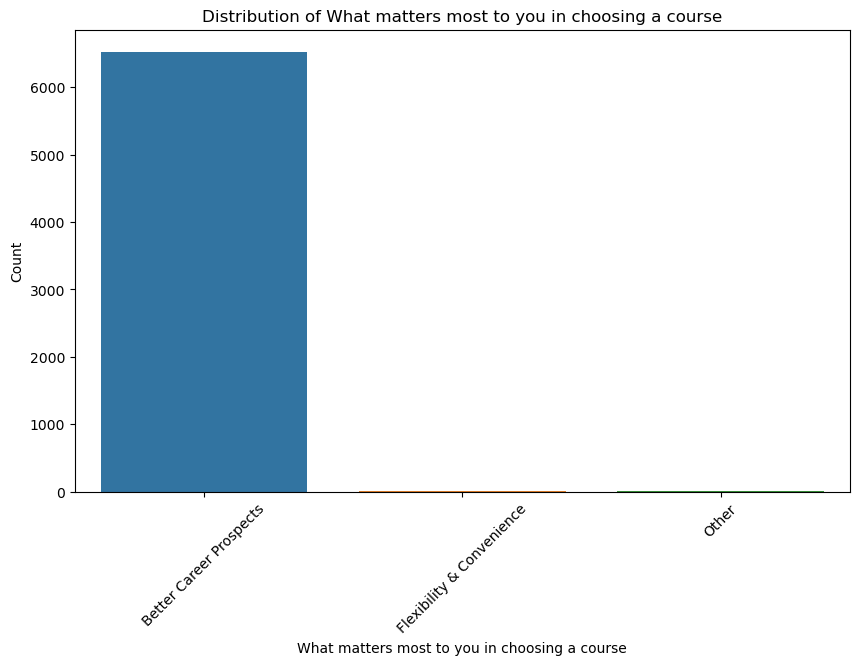

In [9]:
# Visualize the column
plt.figure(figsize=(10, 6))
sns.countplot(data=leads_data, x='What matters most to you in choosing a course')
plt.xticks(rotation=45)
plt.xlabel('What matters most to you in choosing a course')
plt.ylabel('Count')
plt.title('Distribution of What matters most to you in choosing a course')
plt.show()

In [10]:
# finding the percentage of different categories in the 'What matters most to you in choosing a course' 
round(leads_data['What matters most to you in choosing a course'].value_counts(normalize=True) * 100, 2)


Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

### Insights 
In the 'What matters most to you in choosing a course' column, we have a highly imbalanced distribution of categories, with one category ('Better Career Prospects') dominating the others. To address this skewness, we can consider remove this column 

In [11]:
# Dropping this column 
leads_data=leads_data.drop('What matters most to you in choosing a course',axis=1)

### 1.2.4 Handle the missing values in the 'What is your current occupation'

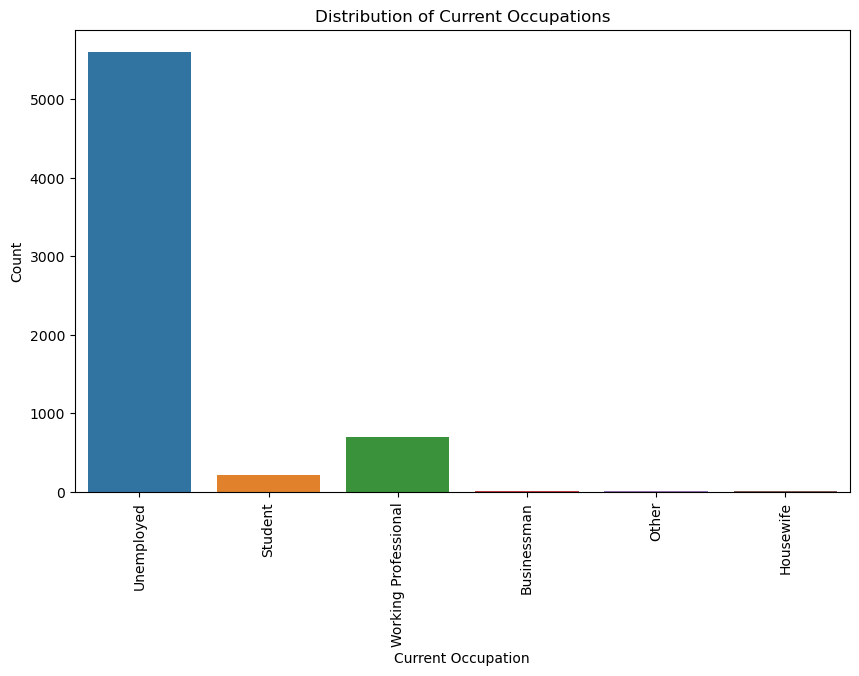

In [12]:
plt.figure(figsize=(10, 6))  # Adjust the figure size to improve readability
sns.countplot(data=leads_data, x='What is your current occupation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.title('Distribution of Current Occupations')
plt.show()

In [13]:
# Finding the percentage of the different categories of this column:
round(leads_data['What is your current occupation'].value_counts(normalize=True),4)*100

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [14]:
#combine the categories "Other," "Housewife," and "Student" into a single category named 'Unemployed' and combine 'Businessman' into 'Working Professional' in the 'What is your current occupation'
leads_data['What is your current occupation'].replace({'Other': 'Unemployed', 'Housewife': 'Unemployed', 'Student': 'Unemployed', 'Businessman': 'Working Professional'}, inplace=True)
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan,'Unemployed')
# Finding the percentage of the different categories after combining 
round(leads_data['What is your current occupation'].value_counts(normalize=True),4)*100

Unemployed              92.27
Working Professional     7.73
Name: What is your current occupation, dtype: float64

### 1.2.5 Handling the 'Country' 

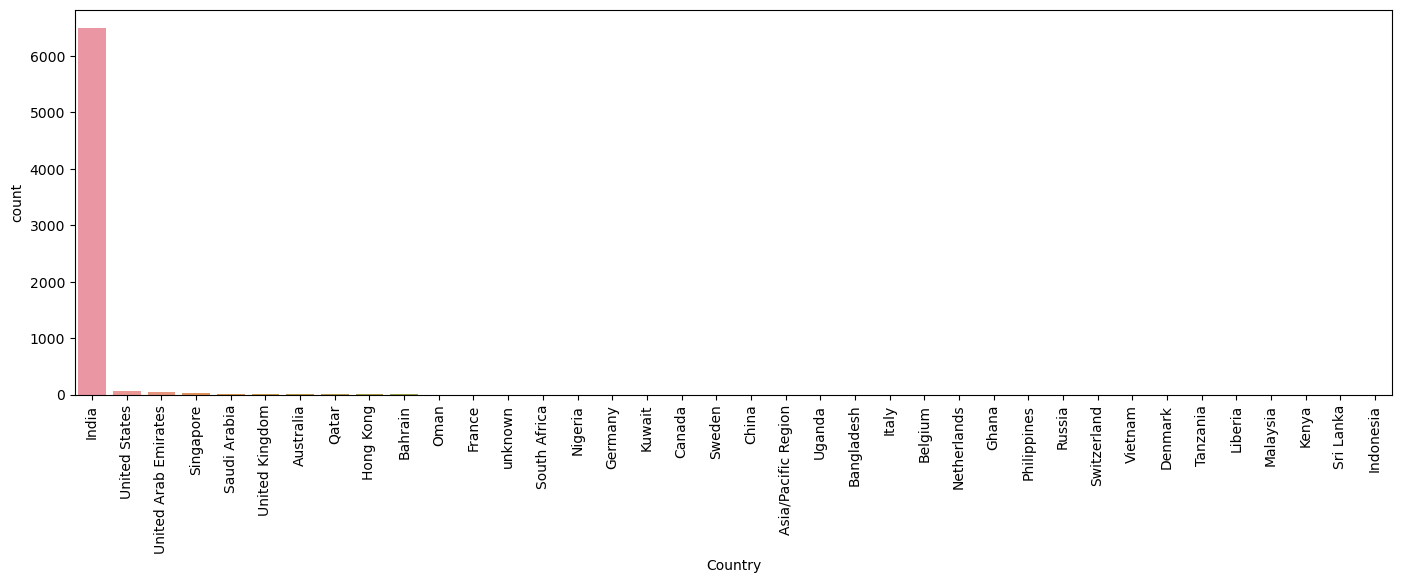

In [15]:
plt.figure(figsize=(17,5))
sns.countplot(data=leads_data, x='Country', order=leads_data['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [16]:
# Finding the percentage of the different categories of this column:
round(leads_data['Country'].value_counts(normalize=True),4)*100

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

#### Insights 

The majority of leads are from India, with a significant percentage. The remaining countries have a much smaller share of leads. 

In [17]:
# Impute missing values in 'Country' with 'India'
leads_data['Country'].fillna('India', inplace=True)
# Finding the percentage of the different categories after combining 
round(leads_data['Country'].value_counts(normalize=True),4)*100

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

### 1.2.6 Handle the missing 'City' 
Imputation with the Most Frequent City:
we can impute the missing values in the 'City'column - missing value around 40% with the most frequent city in the dataset. 

In [18]:
# Impute missing values in 'City' with the most frequent city
most_frequent_city = leads_data['City'].mode()[0]
leads_data['City'].fillna(most_frequent_city, inplace=True)


In [19]:
# Finding the percentage of the different categories after Imputation 
round(leads_data['City'].value_counts(normalize=True),4)*100

Mumbai                         74.58
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

### 1.2.7 Rest missing values are under 2% so we can drop these rows.

In [20]:
# Drop rows with missing values under 2%
leads_data = leads_data.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity'])


In [21]:
# Finding the null percentages across columns after handling missing values
round(leads_data.isnull().sum() / len(leads_data.index), 2) * 100


Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [22]:
# Percentage of rows retained 
(len(leads_data.index)/9240)*100

98.51731601731602

## 1.3 Explore the data to understand its distribution and characteristics:

In [23]:
# Summary statistics
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [24]:
# Data types and non-null counts
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9103 non-null   object 
 1   Lead Number                               9103 non-null   int64  
 2   Lead Origin                               9103 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9103 non-null   object 
 5   Do Not Call                               9103 non-null   object 
 6   Converted                                 9103 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9103 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [25]:
# Explore categorical variables using value_counts()
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [26]:
#Checking for duplicates:
leads_data[leads_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates showed 

# STEP 2: DATA ANALYSIS AND VISUALIZATION 

## 2.1. Univariate Analysis and Bivariate Analysis

### 2.1.1 Explore the relationship between different features and the 'Converted' target variable:

In [27]:
# Calculate the percentage of converted leads
conversion_rate = (sum(leads_data['Converted']) / len(leads_data['Converted'].index)) * 100
print(conversion_rate)



38.02043282434362


The conversion rate in the dataset is approximately 38.02%. This means that around 38.02% of the leads have been successfully converted, while the remaining percentage has not been converted.

### 2.1.2 Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

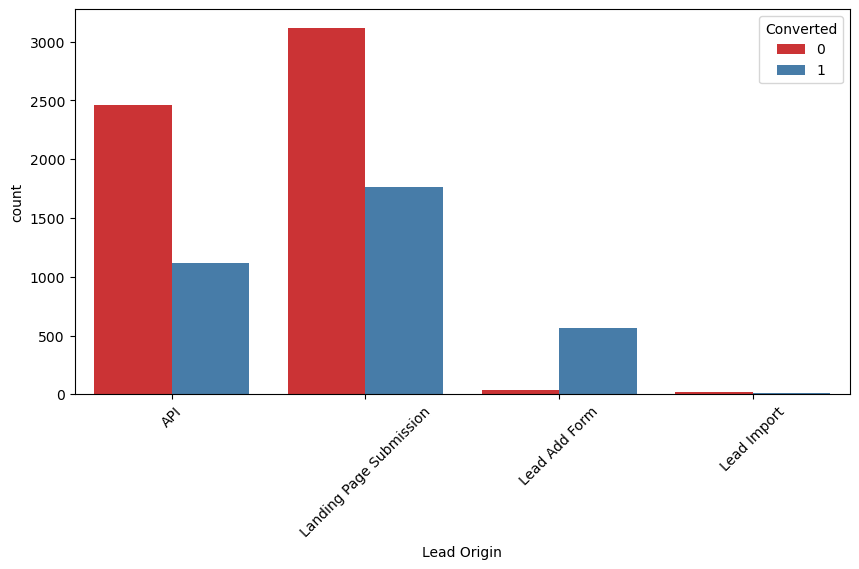

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Lead Origin", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=45)


### Insights

- API and Landing Page Submission have a conversion rate of around 30-35%, which is a significant portion of the conversions. However, there is room for improvement in the conversion rates for these lead origins.

- Lead Add Form has an exceptionally high conversion rate, with more than 90% of leads getting converted. While the conversion rate is high, the count of leads is relatively low. To improve the overall lead conversion rate, it would be beneficial to generate more leads from Lead Add Form.

- Lead Import has very few leads, and the conversion rate is not very high. This lead source may not be very effective in terms of conversions.

To optimize lead conversion, we should focus on both improving the conversion rates of API and Landing Page Submission, and increasing the lead generation from Lead Add Form. This strategy can help boost overall conversion rates and lead to more successful conversions.

### 2.1.3 Lead Source 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

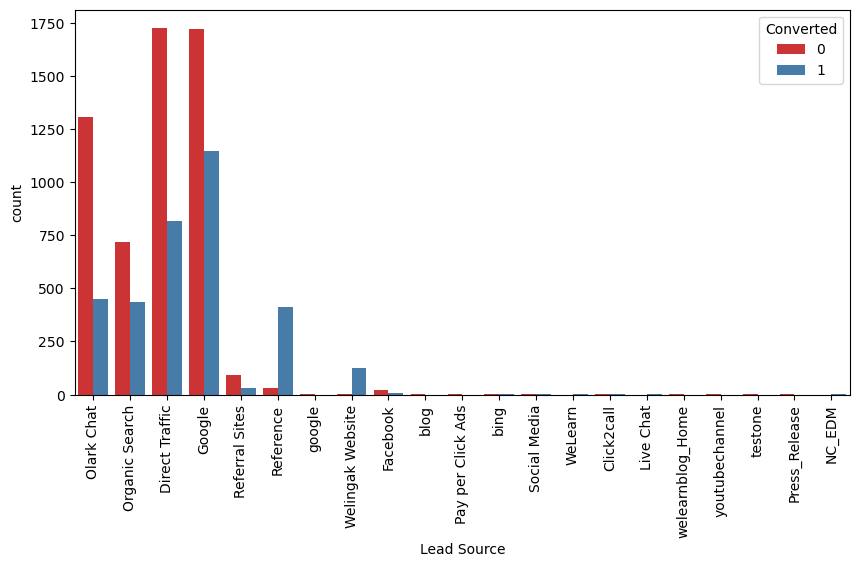

In [29]:
# Visualize the data
plt.figure(figsize=(10, 5))
sns.countplot(x="Lead Source", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=90)

In [30]:
# Replace 'google' with 'Google'
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')

In [31]:
# Create a new category 'Others' for some of the Lead Sources with low values
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

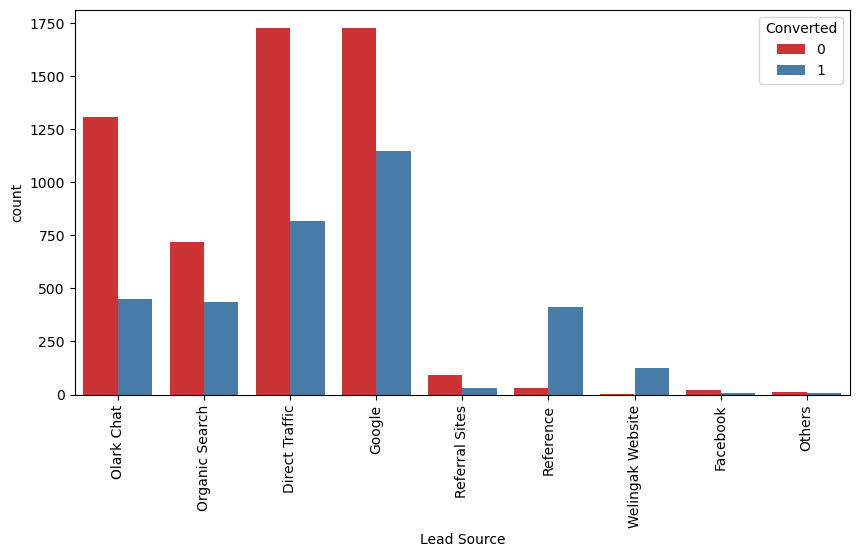

In [32]:
# Visualize the data again
plt.figure(figsize=(10, 5))
sns.countplot(x="Lead Source", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=90)

### Insights
- Google and Direct traffic generate the maximum number of leads.
- The conversion rate of reference leads and leads through the welingak website is high.
- To improve the overall lead conversion rate, the focus should be on improving lead conversion of olark chat, organic search, direct traffic, and Google leads, and generating more leads from reference and the welingak website.

### 2.1.4 Do Not Call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

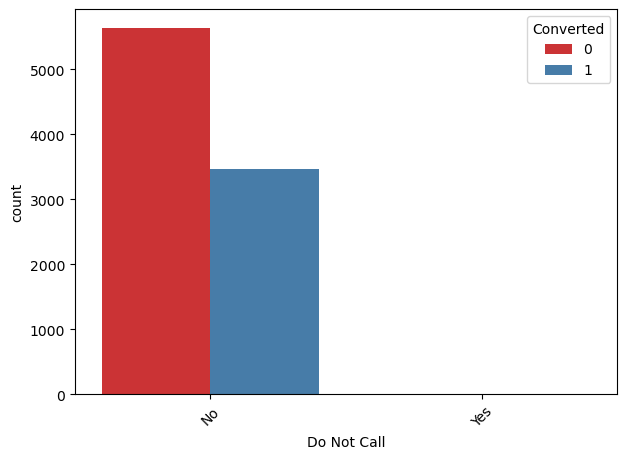

In [33]:
plt.figure(figsize=(7, 5))
sns.countplot(x="Do Not Call", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=45)


### Insights
- Most entries are 'No' for 'Do Not Call'.
- No significant inference can be drawn from this parameter.

### 2.1.5 Total Visits

<Axes: xlabel='Converted', ylabel='TotalVisits'>

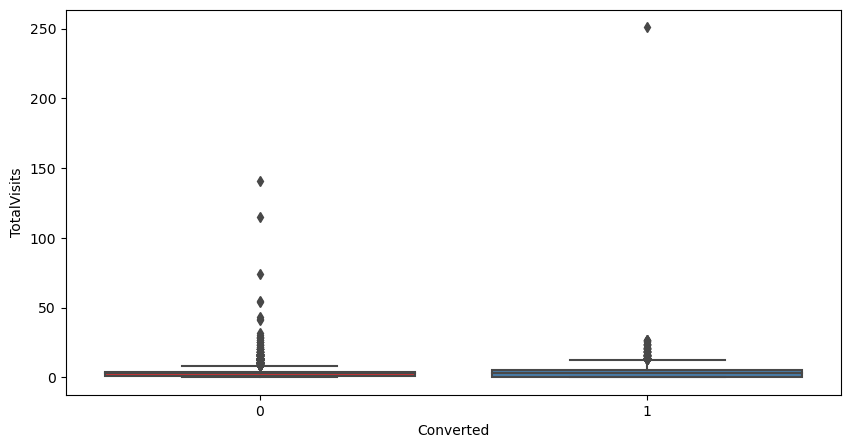

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="TotalVisits", x="Converted", data=leads_data, palette='Set1')


### Insights:

- The median total visits for converted and non-converted leads are similar.
- There are outliers in both converted and non-converted leads, with some leads having a significantly higher number of total visits.

### 2.1.6 Total Time Spent on Website

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

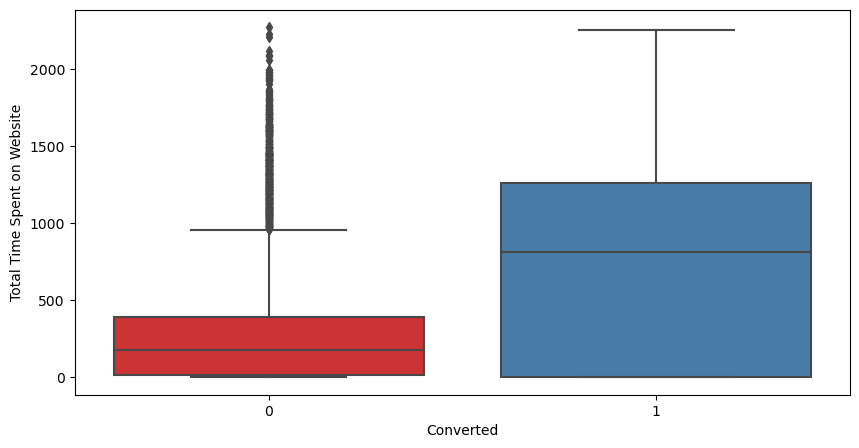

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="Total Time Spent on Website", x="Converted", data=leads_data, palette='Set1')


### Insights:
- Leads that spent more time on the website are more likely to be converted.
- There are outliers in non-converted leads, with some leads spending significantly more time on the website.

### 2.1.7 Page Views Per Visit

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

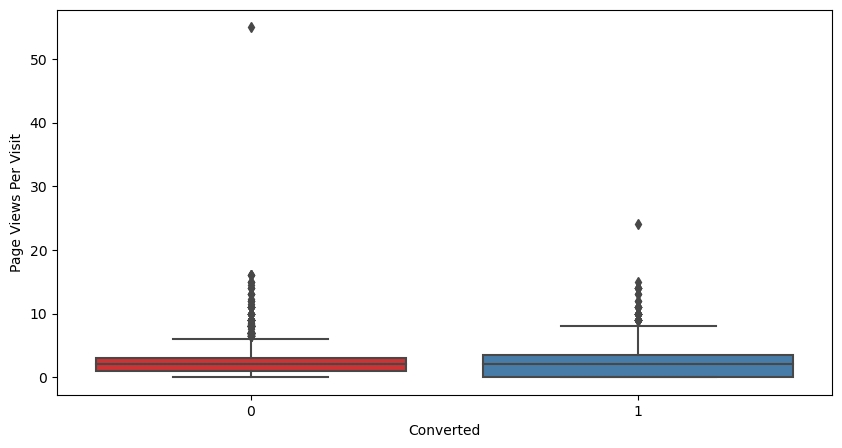

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(y="Page Views Per Visit", x="Converted", data=leads_data, palette='Set1')


### Insights:

- The median page views per visit are similar for converted and non-converted leads.
- There are outliers in both converted and non-converted leads, with some leads having a significantly higher number of page views per visit.

### 2.1.8 Last Activity

In [37]:
leads_data['Last Activity'].describe()

count             9103
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

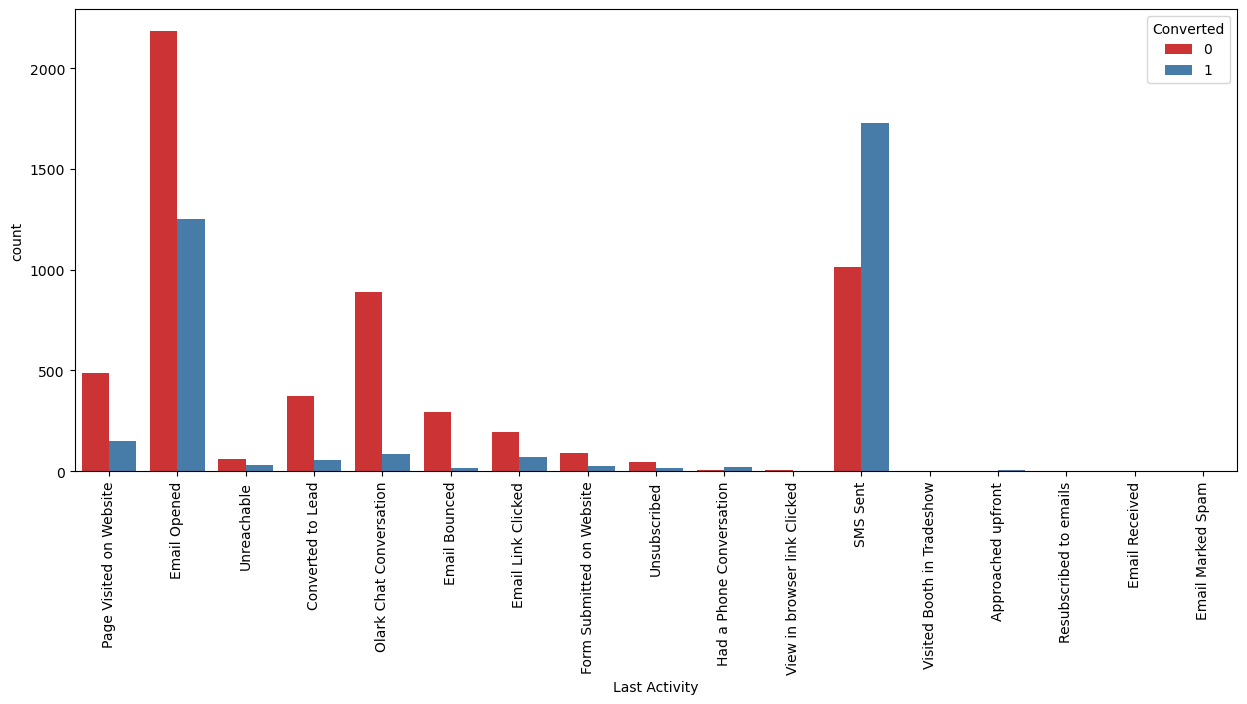

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

In [39]:
# We can club the last activities to "Other_Activity" which are having less data.
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

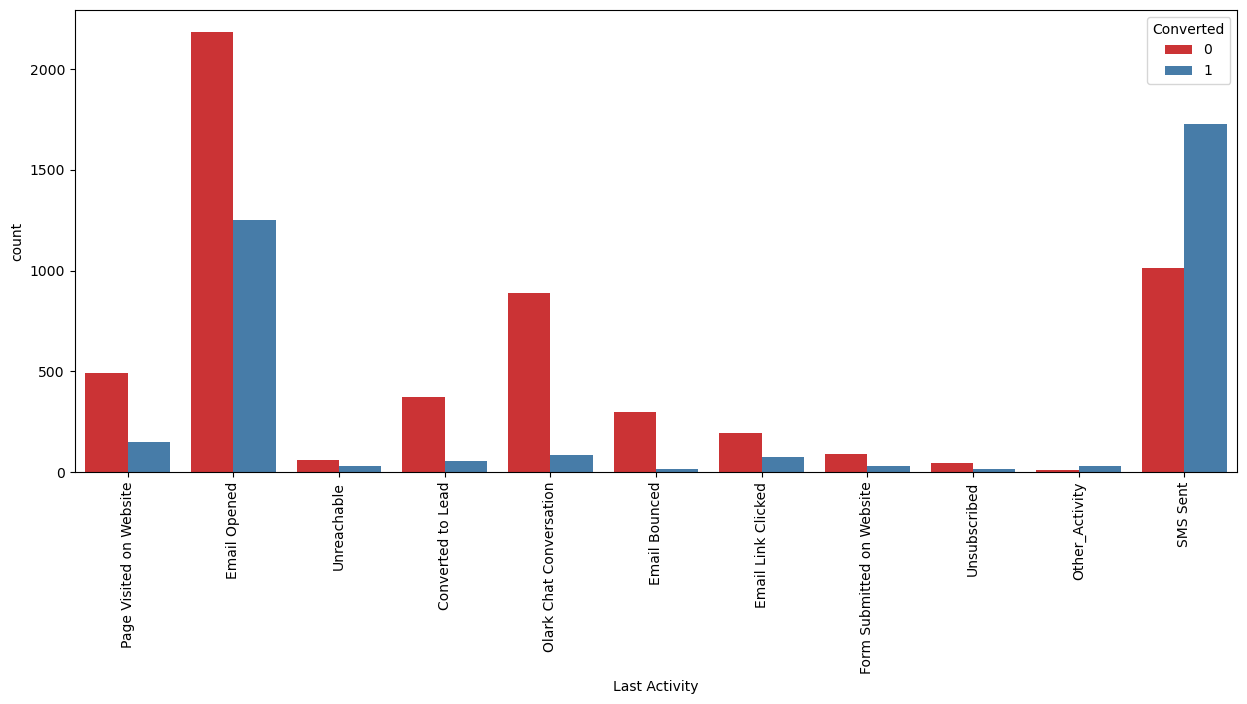

In [40]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Insight
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.

### 2.1.9 Country

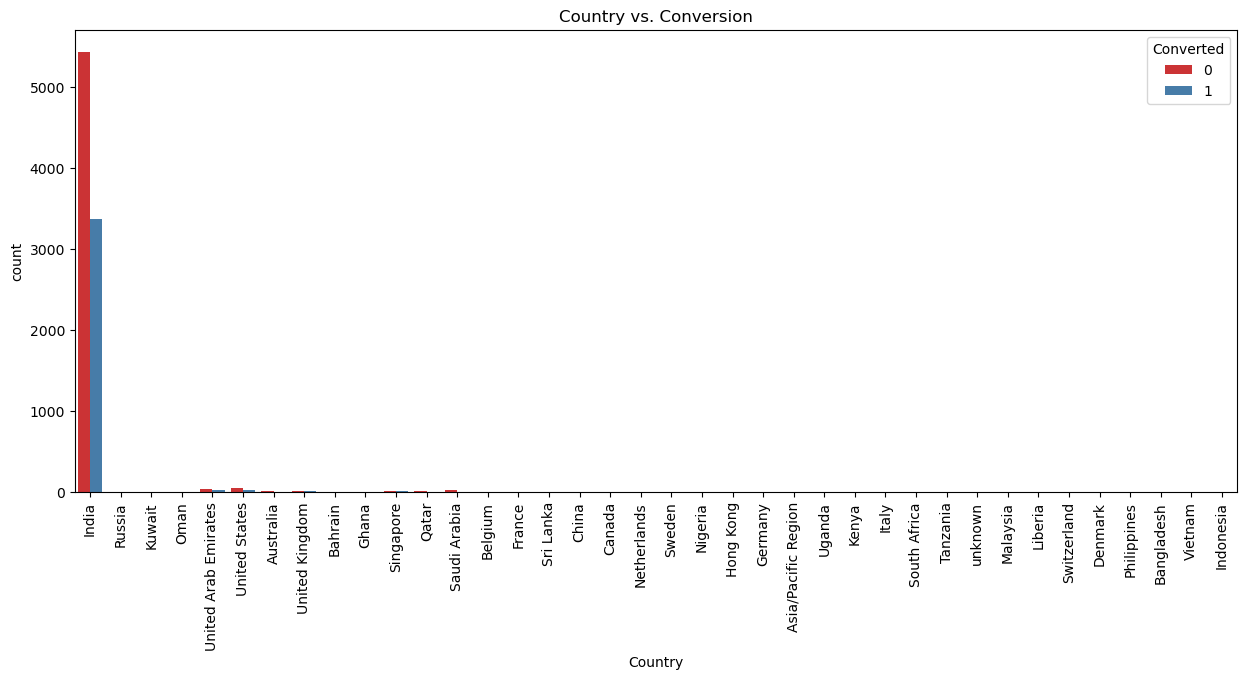

In [41]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Country", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=90)
plt.title("Country vs. Conversion")
plt.show()

### Insights
most values in the 'Country' column are 'India,' and you couldn't draw any significant inference from this column. It seems that the 'Country' column doesn't provide meaningful information for predicting conversions.

### 2.1.10 Specialization

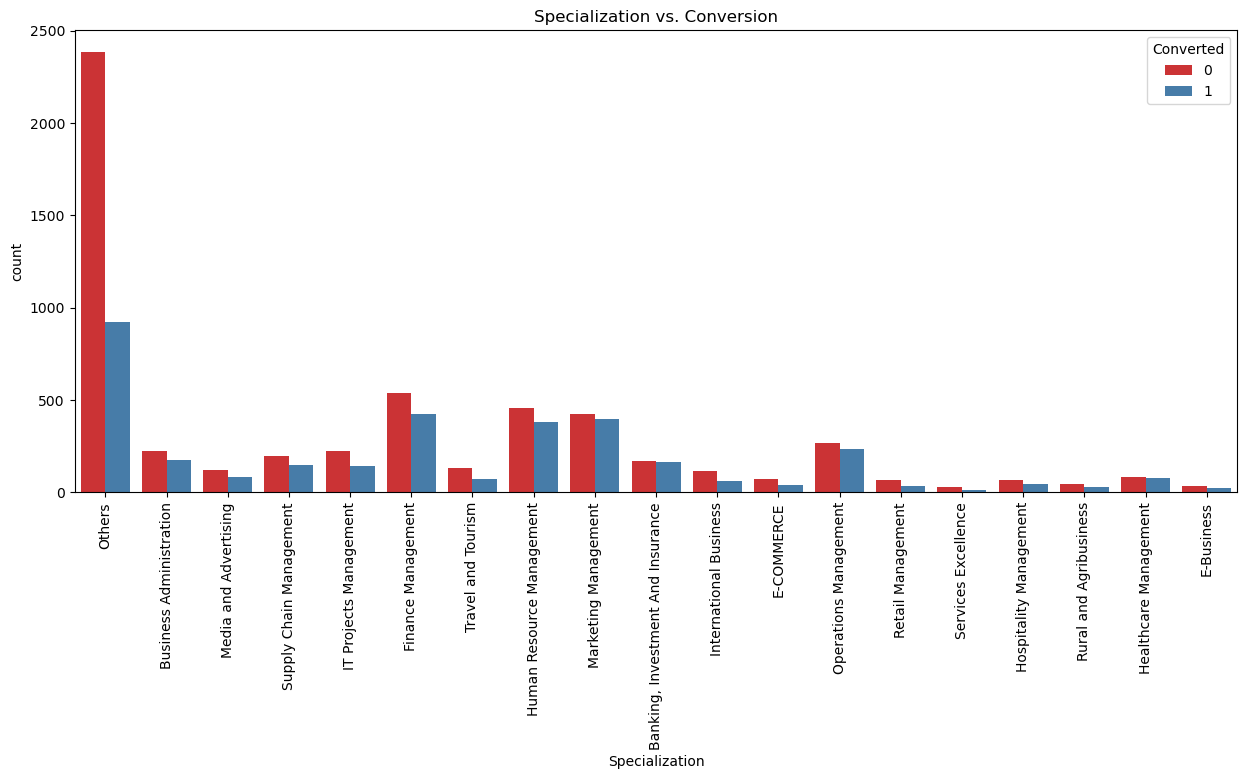

In [42]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Specialization", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=90)
plt.title("Specialization vs. Conversion")
plt.show()

### Insight
Focus should be more on the Specialization with a high conversion rate.

### 2.1.11 What is your current occupation

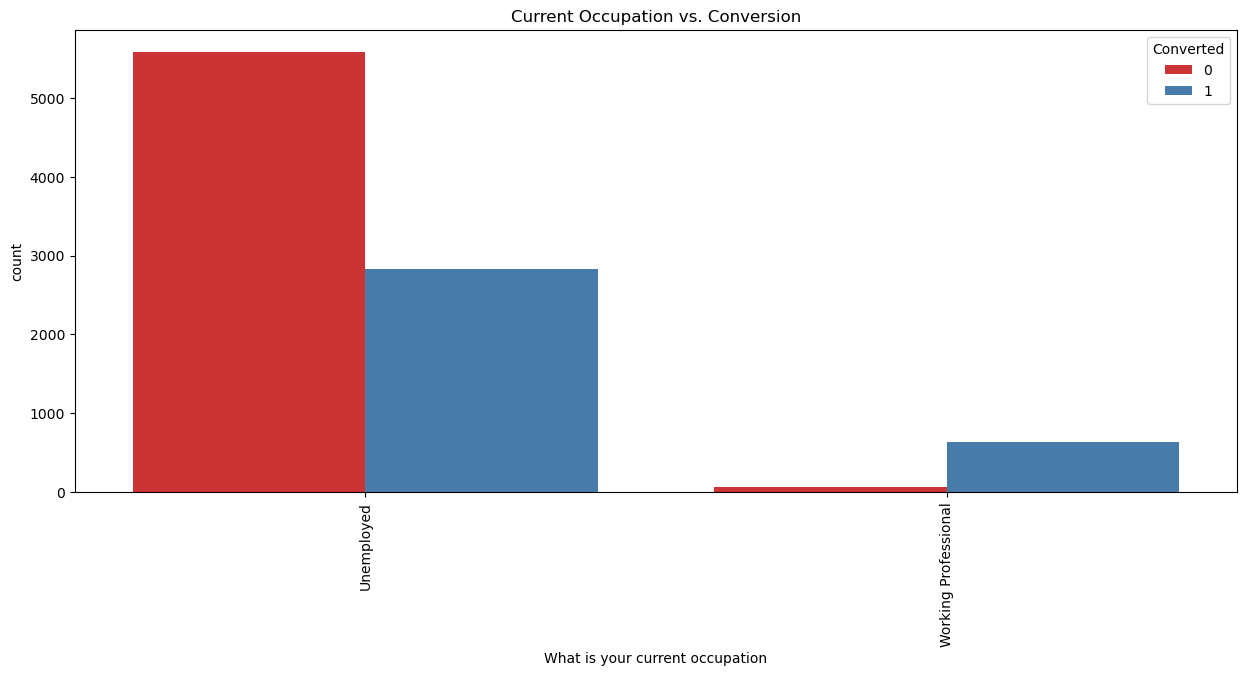

Insights:
1. Working Professionals going for the course have a high chance of joining it.
2. Unemployed leads are the most in numbers but have around 30-35% conversion rate.


In [43]:
plt.figure(figsize=(15, 6))
sns.countplot(x="What is your current occupation", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=90)
plt.title("Current Occupation vs. Conversion")
plt.show()

# Insights
print("Insights:")
print("1. Working Professionals going for the course have a high chance of joining it.")
print("2. Unemployed leads are the most in numbers but have around 30-35% conversion rate.")


### 2.1.12 Search

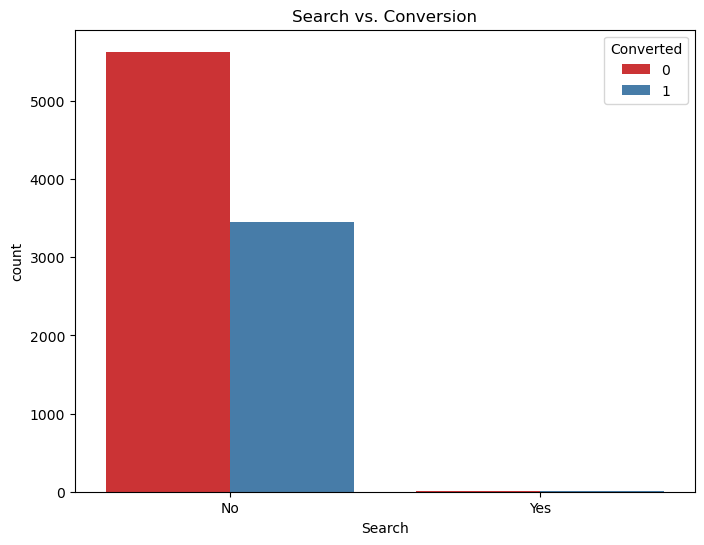

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Search", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=0)
plt.title("Search vs. Conversion")
plt.show()

In [45]:
# Insights
print("Insights:")
print("Most entries are 'No'. No inference can be drawn from this parameter.")

Insights:
Most entries are 'No'. No inference can be drawn from this parameter.


### 2.1.13 Magazine

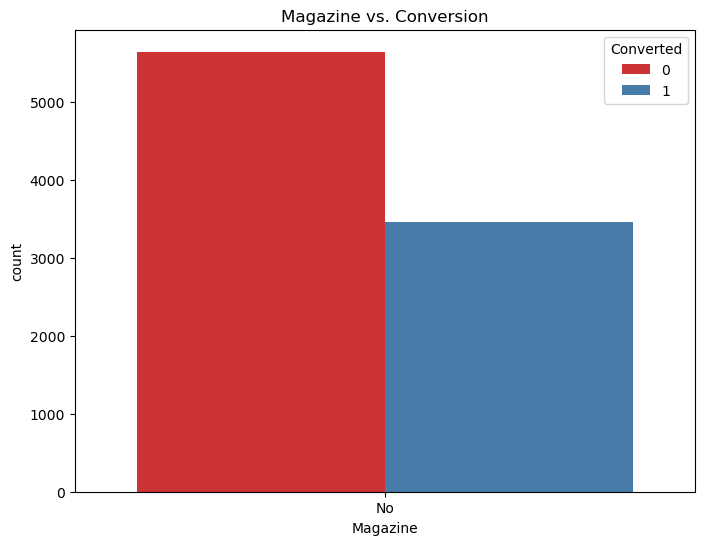

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Magazine", hue="Converted", data=leads_data, palette='Set1')
plt.xticks(rotation=0)
plt.title("Magazine vs. Conversion")
plt.show()

### insights:

- Most entries are 'No'.
- No meaningful inference can be drawn from this parameter.
In other words, the vast majority of leads have not shown an interest in or engagement with magazines, making it difficult to derive any useful information or patterns related to conversion from this column.

### 2.1.14 Newspaper Article

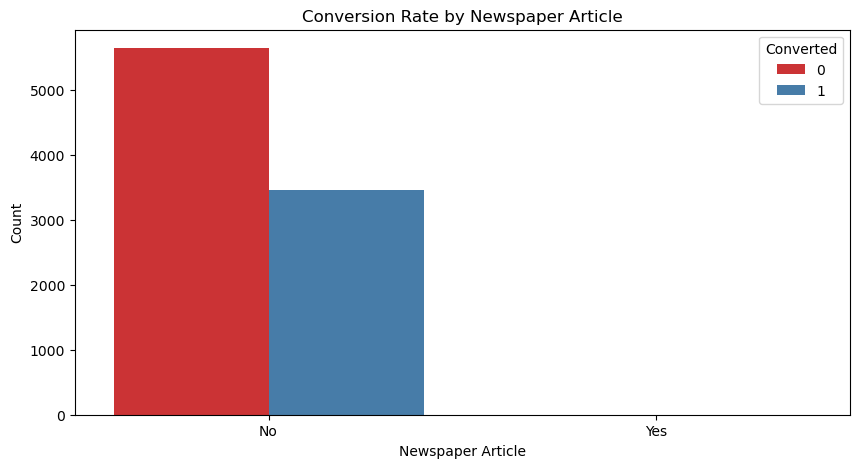

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Newspaper Article", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=0)
plt.xlabel("Newspaper Article")
plt.ylabel("Count")
plt.title("Conversion Rate by Newspaper Article")
plt.show()


### Insights:

- The majority of entries are labeled as 'No' for 'Newspaper Article.'
- The conversion rate for 'No' and 'Yes' in the 'Newspaper Article' column is similar, so no significant inference can be drawn from this parameter.
- Given that the conversion rate is similar for both categories, this column may not be a strong predictor of lead conversions.

### 2.1.15 X Education Forums

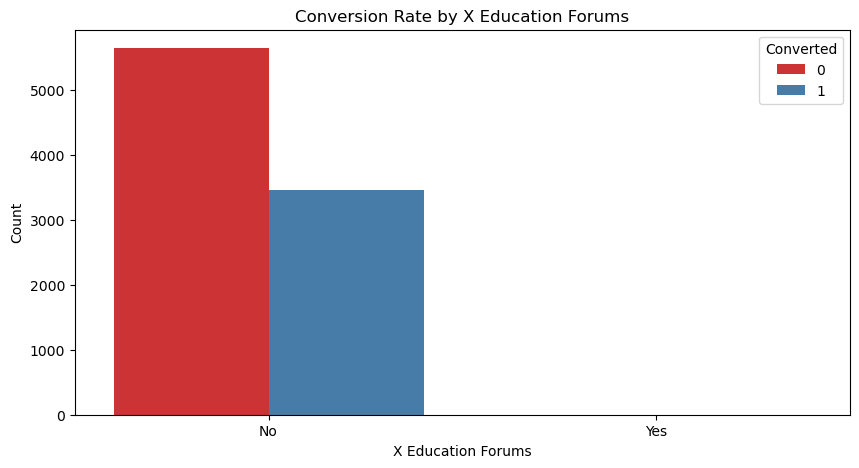

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x="X Education Forums", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=0)
plt.xlabel("X Education Forums")
plt.ylabel("Count")
plt.title("Conversion Rate by X Education Forums")
plt.show()

### Insights:

- The majority of entries are labeled as 'No' for 'X Education Forums.'
- The conversion rate for 'No' and 'Yes' in the 'X Education Forums' column is similar, so no significant inference can be drawn from this parameter.
- Given that the conversion rate is similar for both categories, this column may not be a strong predictor of lead conversions.

### 2.1.16 Newspaper

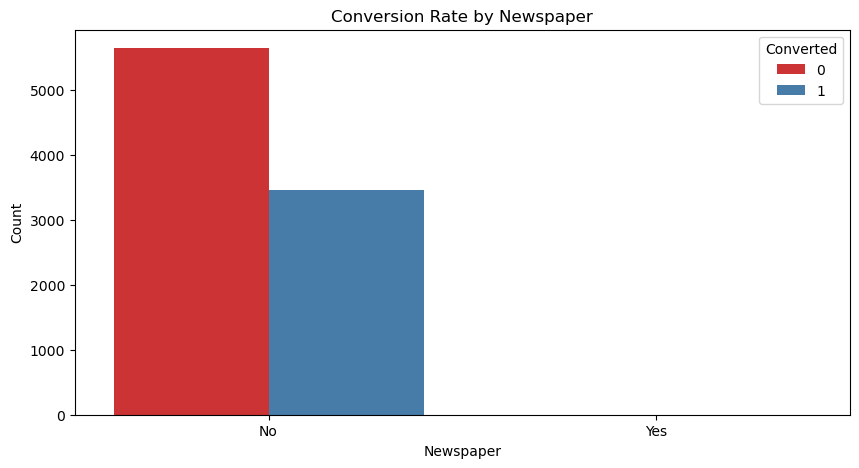

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Newspaper", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=0)
plt.xlabel("Newspaper")
plt.ylabel("Count")
plt.title("Conversion Rate by Newspaper")
plt.show()


### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.17 Digital Advertisement

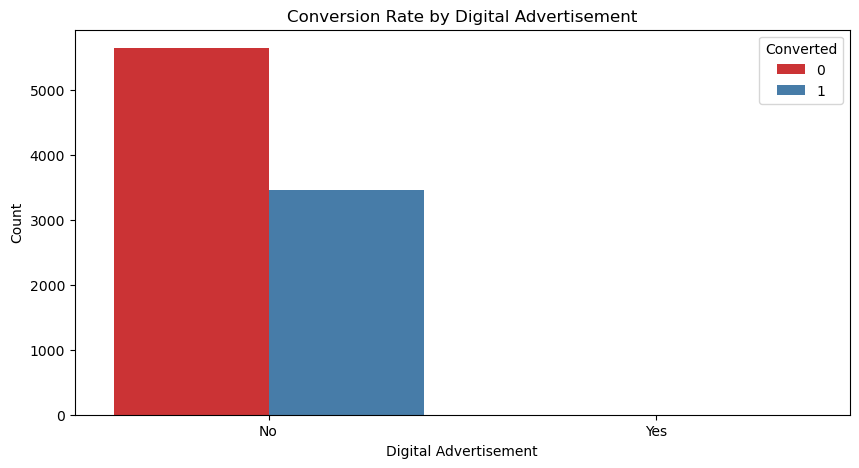

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Digital Advertisement", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=0)
plt.xlabel("Digital Advertisement")
plt.ylabel("Count")
plt.title("Conversion Rate by Digital Advertisement")
plt.show()

### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.18 Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

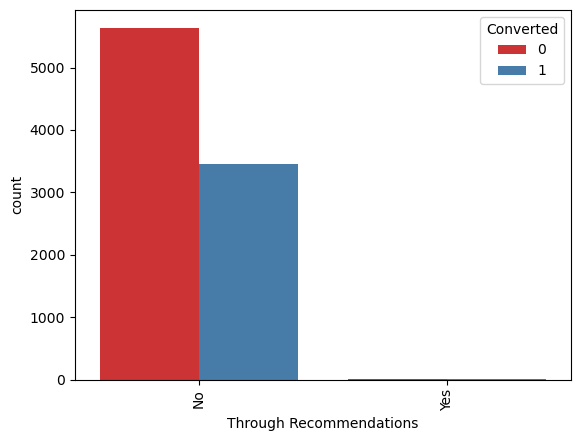

In [51]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.19 Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

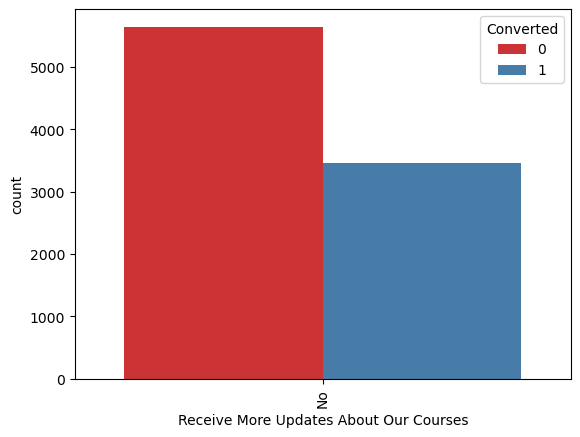

In [52]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.20 Tags

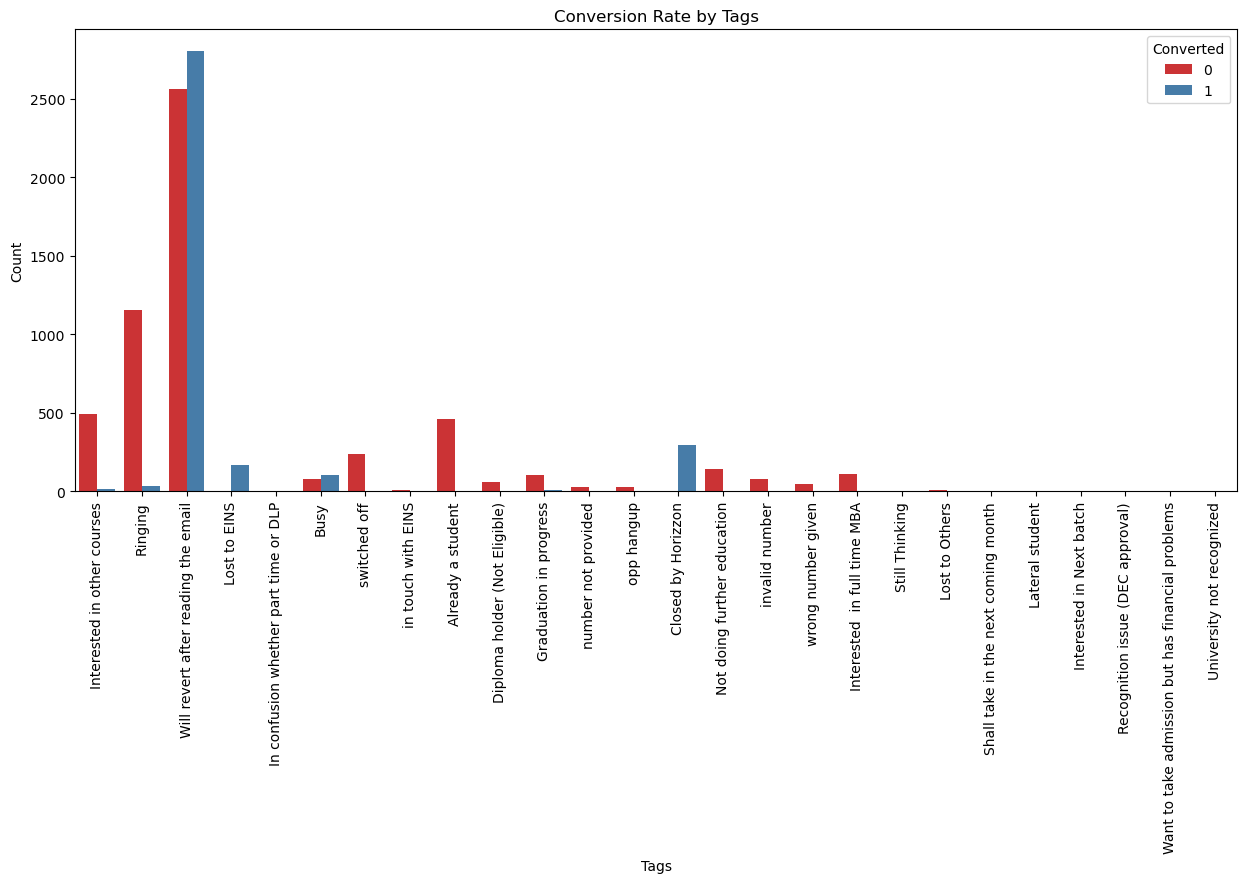

In [53]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Tags", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Conversion Rate by Tags")
plt.show()

### Insights:

- The "Tags" column represents lead tags generated by the sales team, and it has a significant impact on lead conversion.
- Several tags, such as "Will revert after reading the email," "Closed by Horizzon," and "Lost to EINS," have high conversion rates.
- Identifying and prioritizing certain tags, like "Will revert after reading the email," can improve lead conversion rates.
- This column contains valuable information for modeling and analysis.

### 2.1.21 Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

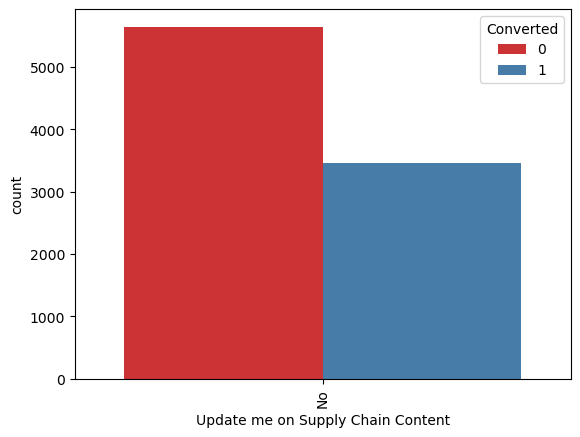

In [54]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.22 Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

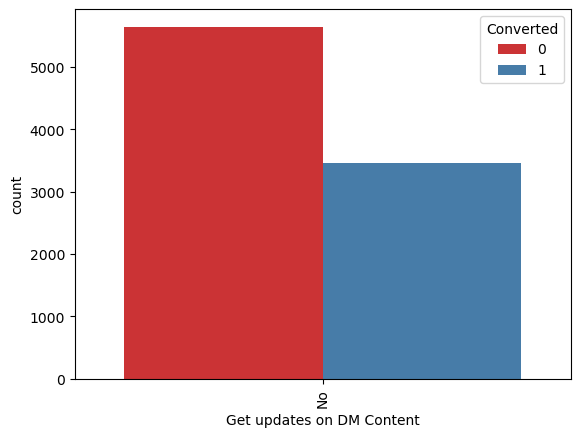

In [55]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.23 City

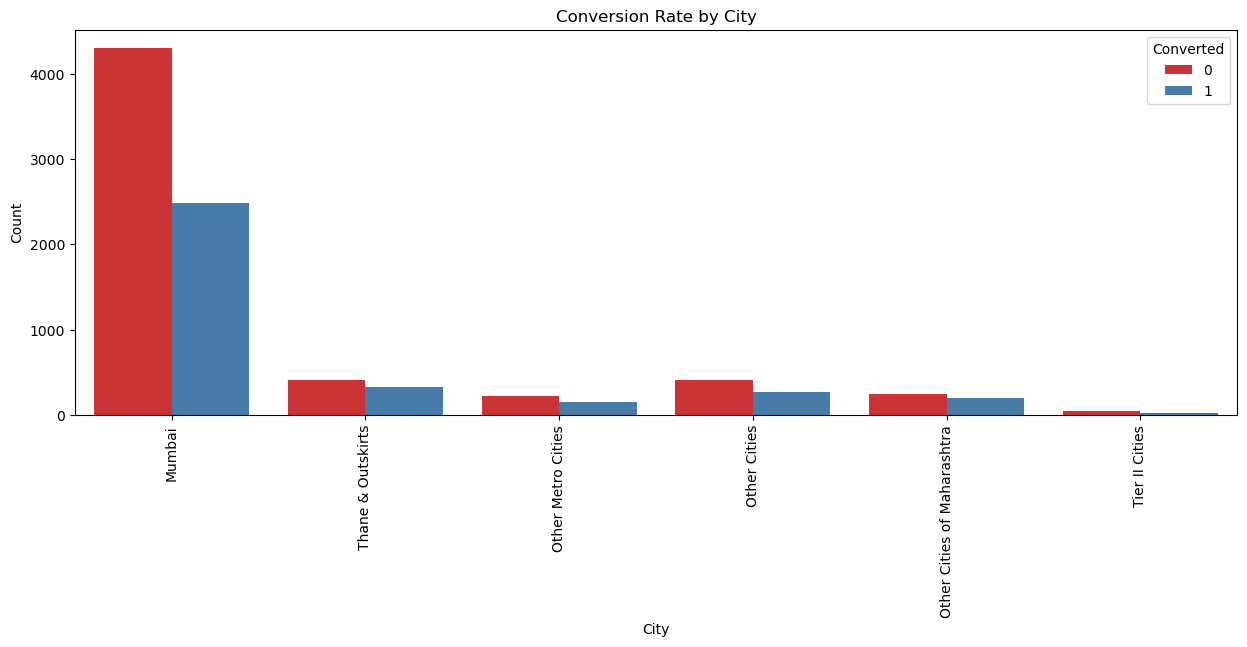

In [56]:
plt.figure(figsize=(15, 5))
sns.countplot(x="City", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Conversion Rate by City")
plt.show()

### Insights:

- Most leads are from Mumbai, and they have a conversion rate of around 50%.
- Other cities also contribute to leads, but Mumbai stands out with the highest lead count.
- City information can be valuable for targeting leads in specific regions or analyzing regional conversion patterns.

### 2.1.24 I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

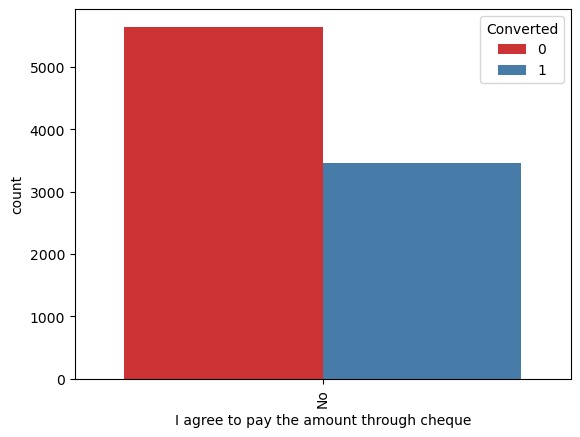

In [57]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Insights
Most entries are 'No'. No Inference can be drawn with this parameter.

### 2.1.25 A free copy of Mastering The Interview

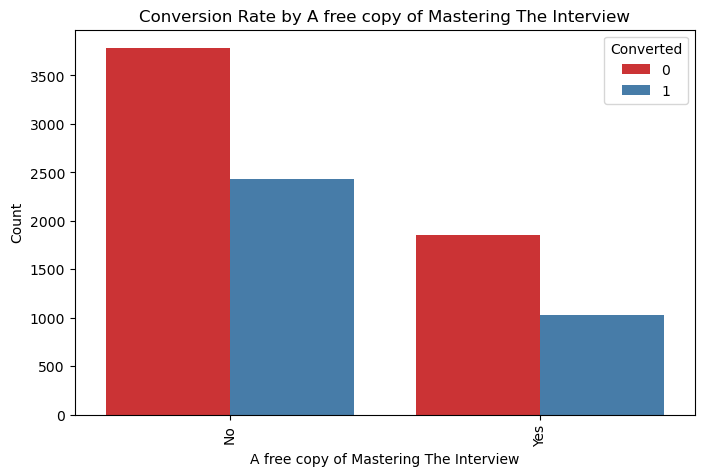

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("A free copy of Mastering The Interview")
plt.ylabel("Count")
plt.title("Conversion Rate by A free copy of Mastering The Interview")
plt.show()

### Insights:

- Most entries are 'No' for requesting a free copy of Mastering The Interview.
- No significant difference in conversion rate between leads who requested a free copy and those who didn't.

### 2.1.26 Last Notable Activity

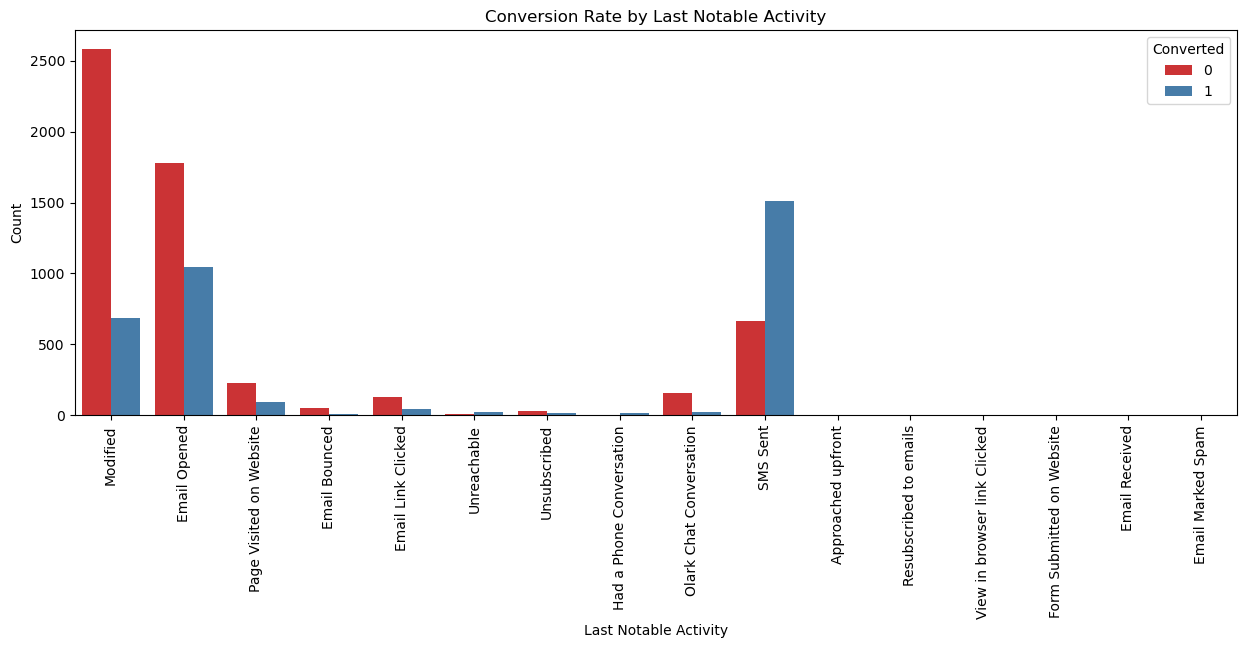

In [59]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Last Notable Activity", hue="Converted", data=leads_data, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Last Notable Activity")
plt.ylabel("Count")
plt.title("Conversion Rate by Last Notable Activity")
plt.show()

### Insights:

- Most leads have their last notable activity as "Modified."
- Conversion rates vary significantly based on the last notable activity. Focusing on specific last notable activities may improve lead conversion.

### Results
#### Insights
#### Based on univariate analysis, we have removed columns that do not appear to provide significant information for the model.


In [60]:
# Columns to drop
columns_to_drop = ['Lead Number', 'Tags', 'Country', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                   'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
                   'A free copy of Mastering The Interview']

# Dropping the columns from the dataset
leads_data = leads_data.drop(columns=columns_to_drop)



In [61]:
leads_data.shape

(9103, 14)

In [62]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9103 non-null   object 
 1   Lead Origin                      9103 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9103 non-null   object 
 4   Do Not Call                      9103 non-null   object 
 5   Converted                        9103 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9103 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9103 non-null   object 
 10  Specialization                   9103 non-null   object 
 11  What is your current occupation  9103 non-null   object 
 12  City                

## 2.2 Data Preparation

### 2.2.1 Converting some binary variables (Yes/No) to 1/0

In [63]:
vars = ['Do Not Email', 'Do Not Call']
leads_data[vars] = leads_data[vars].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


### 2.2.2 Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [64]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                      'What is your current occupation', 'City', 'Last Notable Activity']], 
                            drop_first=True)

# Concatenating the dummy_data to the lead_data dataframe
leads_data = pd.concat([leads_data, dummy_data], axis=1)


In [65]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


**Dropping the original columns for which dummies were created is a common practice to avoid multicollinearity, where one variable can be predicted from the others.**

In [66]:
# Dropping the columns for which dummies were created
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                            'What is your current occupation', 'City', 'Last Notable Activity'], axis=1)


In [67]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 2.2.3 Splitting the data into  train and test set.

In [68]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_data.drop(['Prospect ID', 'Converted'], axis=1)

In [69]:
# Putting target variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 2.2.4  Scaling the features

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,-0.092900,1.476324,-0.394072,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5520,0,0,0.695064,-0.771066,2.111481,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.301082,-0.571257,0.061483,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1566,0,0,2.074000,1.393834,0.517039,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#  calculates the conversion rate as a percentage of converted leads.
Converted = (sum(leads_data['Converted']) / len(leads_data['Converted'].index)) * 100
Converted

38.02043282434362

We have almost 38% lead conversion rate.

## 2.3 Feature Selection Using RFE

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [74]:
#Define logistic regression model and the number of features we want to select:
logreg = LogisticRegression()
num_features = 10  # You can specify the number of features you want to select

In [75]:
# Create RFE object with a logistic regression model
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=num_features)

In [76]:
# Fit RFE to your training data
rfe.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [77]:
# Get the selected features and their ranking
selected_features = rfe.support_
feature_ranking = rfe.ranking_

In [78]:
rfe.support_

array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False])

In [79]:
rfe.ranking_

array([ 1, 12, 31,  2, 32,  1,  1,  9, 24, 29,  3, 37, 54, 28, 30,  1, 42,
       22,  7, 40,  1,  1, 21,  6, 14,  4, 44,  8, 33, 46, 38, 11, 43, 49,
       27, 55, 36, 39,  1, 45, 50, 10, 47, 51,  1, 41, 52, 48, 35, 23, 26,
       19, 34, 16, 53, 56,  5, 15, 18, 20, 17,  1,  1, 25, 13])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 54),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 42),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', False

In [81]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

# 3. Model Building

## 3.1 Assessing the model with StatsModels

### 3.1.1 Model-1

In [82]:
import statsmodels.api as sm

In [83]:
# Define 'cols' with the selected feature names obtained from RFE
cols = X_train.columns[rfe.support_]

# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[cols])

# Create a generalized linear model (GLM) with a binomial family
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm1.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3109.7
Date:                Thu, 09 Nov 2023   Deviance:                       6219.3
Time:                        01:27:09   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2965
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0047      0.102      0.046      0.963      -0.195       0.204
Do Not Email                                            -1.4764      0.152     -9.725      0.000      -1.774      -1.179
Lead Origin_Landing Page Submission                     -1.0723      0.107     -9.988      0.000      -1.283      -0.862
Lead Origin_Lead Add Form                                2.3378      0.225     10.411      0.000       1.898       2.778
Lead Source_Welingak Website                             2.4477      0.757      3.235      0.001       0.965       3.931
Last Activity_Olark Chat Conversation                   -1.3478      0.153     -8.806      0.000      -1.648      -1.048
Last Activity_Other_Activity                             1.6141      0.393      4.110      0.000       0.844       2.384
Specialization_Others                                   -1.2774      0.111    -11.513      0.000      -1.495      -1.060
What is your current occupation_Working Professional     2.5747      0.173     14.906      0.000       2.236       2.913
Last Notable Activity_SMS Sent                           1.6177      0.071     22.660      0.000       1.478       1.758
Last Notable Activity_Unreachable                        1.5373      0.478      3.218      0.001       0.601       2.474
========================================================================================================================
"""

### Insights
Since Pvalue of 'What is your current occupation_Working Professional' is very high, we can drop this column.

In [84]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Working Professional')
print(col1)


Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Specialization_Others', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')


### 3.1.2 Model-2

In [85]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm2.fit()

# Display the summary of the model
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3274.3
Date:                Thu, 09 Nov 2023   Deviance:                       6548.6
Time:                        01:27:09   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2592
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3154      0.097      3.251      0.001       0.125       0.506
Do Not Email                             -1.5005      0.148    -10.151      0.000      -1.790      -1.211
Lead Origin_Landing Page Submission      -1.2064      0.103    -11.693      0.000      -1.409      -1.004
Lead Origin_Lead Add Form                 2.4032      0.222     10.837      0.000       1.969       2.838
Lead Source_Welingak Website              2.3522      0.757      3.109      0.002       0.869       3.835
Last Activity_Olark Chat Conversation    -1.3110      0.147     -8.902      0.000      -1.600      -1.022
Last Activity_Other_Activity              1.6952      0.387      4.376      0.000       0.936       2.454
Specialization_Others                    -1.5665      0.108    -14.548      0.000      -1.778      -1.355
Last Notable Activity_SMS Sent            1.6310      0.070     23.460      0.000       1.495       1.767
Last Notable Activity_Unreachable         1.5434      0.467      3.306      0.001       0.628       2.458
=========================================================================================================
"""

### Insights
Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [86]:
col1 = col1.drop('Lead Origin_Lead Add Form')
print(col1)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Specialization_Others',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


### 3.1.3 Model-3

In [87]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm3.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3362.3
Date:                Thu, 09 Nov 2023   Deviance:                       6724.6
Time:                        01:27:10   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2385
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.7881      0.089      8.876      0.000       0.614       0.962
Do Not Email                             -1.4521      0.144    -10.090      0.000      -1.734      -1.170
Lead Origin_Landing Page Submission      -1.6865      0.096    -17.562      0.000      -1.875      -1.498
Lead Source_Welingak Website              4.5924      0.727      6.319      0.000       3.168       6.017
Last Activity_Olark Chat Conversation    -1.4766      0.146    -10.085      0.000      -1.764      -1.190
Last Activity_Other_Activity              1.6451      0.390      4.220      0.000       0.881       2.409
Specialization_Others                    -1.8963      0.102    -18.623      0.000      -2.096      -1.697
Last Notable Activity_SMS Sent            1.6632      0.069     24.162      0.000       1.528       1.798
Last Notable Activity_Unreachable         1.5349      0.464      3.310      0.001       0.626       2.444
=========================================================================================================
"""

### Insights
Since Pvalue of 'Lead Source_Welingak Website' is very high, we can drop this column.

In [88]:
col1 = col1.drop('Lead Source_Welingak Website')
print(col1)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Specialization_Others', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')


### 3.1.4 Model-4

In [89]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm4.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6364
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3439.0
Date:                Thu, 09 Nov 2023   Deviance:                       6878.0
Time:                        01:27:10   Pearson chi2:                 6.36e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2199
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8174      0.088      9.238      0.000       0.644       0.991
Do Not Email                             -1.3423      0.137     -9.812      0.000      -1.610      -1.074
Lead Origin_Landing Page Submission      -1.7279      0.096    -18.034      0.000      -1.916      -1.540
Last Activity_Olark Chat Conversation    -1.5619      0.145    -10.785      0.000      -1.846      -1.278
Last Activity_Other_Activity              1.6037      0.389      4.126      0.000       0.842       2.366
Specialization_Others                    -1.7917      0.100    -17.837      0.000      -1.989      -1.595
Last Notable Activity_SMS Sent            1.6829      0.068     24.718      0.000       1.549       1.816
Last Notable Activity_Unreachable         1.5199      0.464      3.278      0.001       0.611       2.429
=========================================================================================================
"""

### Insights
Since Pvalue of 'Last Notable Activity_SMS Sent' is very high, we can drop this column.


In [90]:
col1 = col1.drop('Last Notable Activity_SMS Sent')
print(col1)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Specialization_Others', 'Last Notable Activity_Unreachable'],
      dtype='object')


### 3.1.5 Model-5

In [91]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm5.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6365
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3772.9
Date:                Thu, 09 Nov 2023   Deviance:                       7545.9
Time:                        01:27:10   Pearson chi2:                 6.39e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1337
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1967      0.086     13.992      0.000       1.029       1.364
Do Not Email                             -1.2658      0.129     -9.831      0.000      -1.518      -1.013
Lead Origin_Landing Page Submission      -1.6070      0.092    -17.474      0.000      -1.787      -1.427
Last Activity_Olark Chat Conversation    -2.0133      0.143    -14.122      0.000      -2.293      -1.734
Last Activity_Other_Activity              1.1138      0.386      2.884      0.004       0.357       1.871
Specialization_Others                    -1.7055      0.096    -17.681      0.000      -1.895      -1.516
Last Notable Activity_Unreachable         1.0400      0.462      2.252      0.024       0.135       1.945
=========================================================================================================
"""

### Insights
Since Pvalue of 'Last Activity_Other_Activity' is very high, we can drop this column.


In [92]:
col1 = col1.drop('Last Activity_Other_Activity')
print(col1)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'Last Notable Activity_Unreachable'],
      dtype='object')


### 3.1.6 Checking for VIF values:

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the predictor variables for which you want to calculate VIF
predictors = X_train[col1]

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Feature"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF values
print(vif)


                                 Feature       VIF
0                           Do Not Email  1.100296
1    Lead Origin_Landing Page Submission  1.080684
2  Last Activity_Olark Chat Conversation  1.267530
3                  Specialization_Others  1.292011
4      Last Notable Activity_Unreachable  1.003084


In [94]:
# Dropping the column  'Specialization_Others' because it has high VIF
col1 = col1.drop('Specialization_Others')
print(col1)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


### 3.1.7 Model-6

In [95]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm6.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6367
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3956.1
Date:                Thu, 09 Nov 2023   Deviance:                       7912.3
Time:                        01:27:10   Pearson chi2:                 6.39e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08244
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0230      0.042     -0.547      0.585      -0.106       0.059
Do Not Email                             -1.3306      0.126    -10.524      0.000      -1.578      -1.083
Lead Origin_Landing Page Submission      -0.4051      0.055     -7.344      0.000      -0.513      -0.297
Last Activity_Olark Chat Conversation    -2.2283      0.139    -16.031      0.000      -2.501      -1.956
Last Notable Activity_Unreachable         1.2193      0.448      2.721      0.006       0.341       2.097
=========================================================================================================
"""

### Insights

Since Pvalue of 'Last Notable Activity_Unreachable' is very high, we can drop this column.

In [96]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Last Notable Activity_Unreachable')
print(col1)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')


### 3.1.8 Model-7

In [97]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm7.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3960.3
Date:                Thu, 09 Nov 2023   Deviance:                       7920.7
Time:                        01:27:10   Pearson chi2:                 6.39e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08123
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0180      0.042     -0.428      0.669      -0.100       0.064
Do Not Email                             -1.3363      0.126    -10.570      0.000      -1.584      -1.088
Lead Origin_Landing Page Submission      -0.4040      0.055     -7.330      0.000      -0.512      -0.296
Last Activity_Olark Chat Conversation    -2.2334      0.139    -16.069      0.000      -2.506      -1.961
=========================================================================================================
"""

### Insights

Since Pvalue of 'Lead Origin_Landing Page Submission' is very high, we can drop this column.

In [98]:
col1 = col1.drop('Lead Origin_Landing Page Submission')
print(col1)

Index(['Do Not Email', 'Last Activity_Olark Chat Conversation'], dtype='object')


### 3.1.9 Checking for VIF values:

In [99]:
# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Feature"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF values
print(vif)


                                 Feature       VIF
0                           Do Not Email  1.100296
1    Lead Origin_Landing Page Submission  1.080684
2  Last Activity_Olark Chat Conversation  1.267530
3                  Specialization_Others  1.292011
4      Last Notable Activity_Unreachable  1.003084


In [100]:
# Dropping the column  'Last Activity_Olark Chat Conversation' to reduce the variables
col1 = col1.drop('Last Activity_Olark Chat Conversation')
print(col1)

Index(['Do Not Email'], dtype='object')


### 3.1.10 Model-8

In [101]:
# Add a constant to the features matrix (X_train)
X_train_sm = sm.add_constant(X_train[col1])

# Create a generalized linear model (GLM) with a binomial family
logm8 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the GLM model to the data
result = logm8.fit()

# Display the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4164.1
Date:                Thu, 09 Nov 2023   Deviance:                       8328.3
Time:                        01:27:10   Pearson chi2:                 6.37e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02054
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4097      0.027    -15.366      0.000      -0.462      -0.357
Do Not Email    -1.2799      0.125    -10.213      0.000      -1.526      -1.034
================================================================================
"""

In [102]:
# Dropping the column  'Do Not Email' to reduce the variables
col1 = col1.drop('Do Not Email')
print(col1)

Index([], dtype='object')


### 3.1.11 Checking for VIF values:

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF


**final model (Model-8) with a set of 11 predictor variables. The low p-values and VIF values indicate that your model is well-fitted and free from multicollinearity issues.**

## 3.2 Making Prediction on the Train set

In [104]:
# Import necessary libraries
from sklearn import metrics

In [105]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

7962    0.398977
5520    0.398977
1962    0.398977
1566    0.398977
9170    0.398977
5097    0.398977
8954    0.398977
309     0.398977
5519    0.398977
1050    0.398977
dtype: float64

In [106]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39897698, 0.39897698, 0.39897698, 0.39897698, 0.39897698,
       0.39897698, 0.39897698, 0.39897698, 0.39897698, 0.39897698])

### 3.2.1 Creating a dataframe with the actual Converted flag and the predicted probabilities

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.398977,7962
1,0,0.398977,5520
2,0,0.398977,1962
3,1,0.398977,1566
4,0,0.398977,9170


### 3.2.2 Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels 

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [108]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.398977,7962,0
1,0,0.398977,5520,0
2,0,0.398977,1962,0
3,1,0.398977,1566,0
4,0,0.398977,9170,0


### 3.2.3 Making the Confusion matrix

In [109]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3953    0]
 [2419    0]]


In [110]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [111]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.6203703703703703


### 3.2.4 Metrics beyond simply accuracy

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.0


In [114]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  1.0


In [115]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.0


In [116]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : nan


C:\Users\nguye\AppData\Local\Temp\ipykernel_15544\2843204537.py:2: RuntimeWarning: invalid value encountered in divide
  print("Positive Predictive Value :",TP / float(TP+FP))


In [117]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.6203703703703703


### Insights

- We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
- We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## 3.3 Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

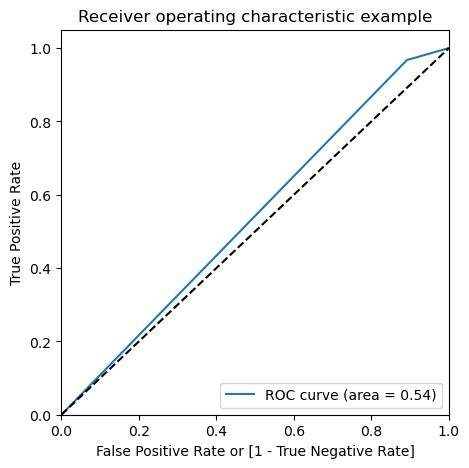

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Insights

- Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.**

### 3.3.1 Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.398977,7962,0,1,1,1,1,0,0,0,0,0,0
1,0,0.398977,5520,0,1,1,1,1,0,0,0,0,0,0
2,0,0.398977,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.398977,1566,0,1,1,1,1,0,0,0,0,0,0
4,0,0.398977,9170,0,1,1,1,1,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.379630  1.000000  0.000000
0.2   0.2  0.434401  0.967342  0.108272
0.3   0.3  0.434401  0.967342  0.108272
0.4   0.4  0.620370  0.000000  1.000000
0.5   0.5  0.620370  0.000000  1.000000
0.6   0.6  0.620370  0.000000  1.000000
0.7   0.7  0.620370  0.000000  1.000000
0.8   0.8  0.620370  0.000000  1.000000
0.9   0.9  0.620370  0.000000  1.000000


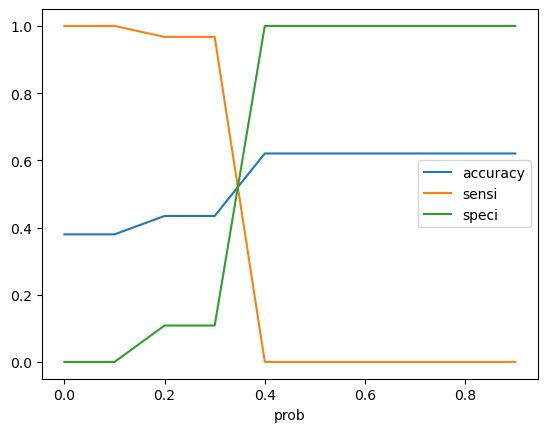

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Insights
From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.398977,7962,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.398977,5520,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.398977,1962,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.398977,1566,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.398977,9170,0,1,1,1,1,0,0,0,0,0,0,1


### 3.3.2 Assigning Lead Score to the Training data


In [125]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.398977,7962,0,1,1,1,1,0,0,0,0,0,0,1,40
1,0,0.398977,5520,0,1,1,1,1,0,0,0,0,0,0,1,40
2,0,0.398977,1962,0,1,1,1,1,0,0,0,0,0,0,1,40
3,1,0.398977,1566,0,1,1,1,1,0,0,0,0,0,0,1,40
4,0,0.398977,9170,0,1,1,1,1,0,0,0,0,0,0,1,40


# 4 Model Evaluation 

In [126]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.43440050219711235


In [127]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[ 428, 3525],
       [  79, 2340]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.9673418768085986


In [130]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.10827219833038199


In [131]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.891727801669618


In [132]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.3989769820971867


In [133]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8441814595660749


## 4.1 Precision and Recall

- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [134]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3953,    0],
       [2419,    0]], dtype=int64)

In [135]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  nan


C:\Users\nguye\AppData\Local\Temp\ipykernel_15544\1344173961.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))


In [136]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.0


Using sklearn utilities for the same

In [137]:
from sklearn.metrics import precision_score, recall_score

In [138]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.0


### 4.1.1 Precision and recall tradeoff¶

In [140]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6367    0
 6368    0
 6369    0
 6370    0
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

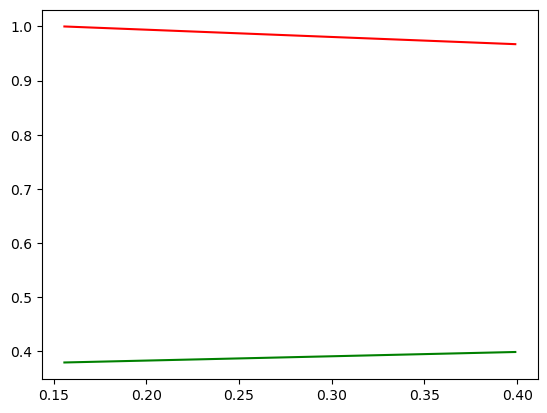

In [142]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Insights
The above graph shows the trade-off between the Precision and Recall .

# 5 Making predictions on the test set

## 5.1 Scaling the test data
Scale the test data: apply the same scaling transformations to the test data. This is important to maintain consistency. We mentioned using MinMaxScaler earlier, so we should apply the same scaler to the test data as we did for the training data. We can use the transform method of the scaler:

In [143]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [144]:
# Add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,1.0,0,0,-0.092900,-0.103815,0.289261,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,1.0,0,0,-0.683873,-0.881052,-1.077404,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,1.0,1,0,-0.289891,0.424120,-0.166294,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1196,1.0,0,0,0.104091,-0.105648,0.744816,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8219,1.0,0,0,0.695064,-0.428274,-0.280183,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [145]:
#Get the Columns in Both Dataframes:
#Start by getting the columns in both the training and test dataframes using the .columns attribute.
train_columns = X_train_sm.columns
test_columns = X_test_sm.columns

In [146]:
# Identify Missing Columns:
# Compare the columns in the two dataframes to identify which columns are present in the training data but missing in the test data.
missing_columns = [col for col in train_columns if col not in test_columns]

In [147]:
# Add Missing Columns to Test Data:
# For each missing column identified in the previous step, you should add them to the test data and set their values to zero or any appropriate default values.
for col in missing_columns:
    X_test_sm[col] = 0  # Set default values (e.g., zero) for missing columns


In [148]:
# Remove Extra Columns:
# If there are columns in the test data that are not present in the training data (which should generally not be the case), you can remove those extra columns from the test data.
extra_columns = [col for col in test_columns if col not in train_columns]
X_test_sm = X_test_sm.drop(extra_columns, axis=1)


In [149]:
# Make predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3504    0.398977
4050    0.398977
7201    0.155819
1196    0.398977
8219    0.398977
8747    0.398977
9048    0.155819
6524    0.398977
7693    0.155819
8187    0.398977
dtype: float64

In [150]:
# Convert y_test_pred to a DataFrame:
y_pred_1 = pd.DataFrame(y_test_pred)

In [151]:
y_pred_1.head()

,0
3504,0.398977
4050,0.398977
7201,0.155819
1196,0.398977
8219,0.398977


In [152]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [153]:
# Add the Prospect ID to the index for both DataFrames:
y_test_df['Prospect ID'] = y_test_df.index

In [154]:
# Remove the index for both DataFrames to append them side by side:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [156]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.398977
1,1,4050,0.398977
2,0,7201,0.155819
3,0,1196,0.398977
4,1,8219,0.398977


In [157]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [158]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [159]:
# Let's see the head of y_pred_final
y_pred_final.head()


,Prospect ID,Converted,Converted_prob
0,3504,0,0.398977
1,4050,1,0.398977
2,7201,0,0.155819
3,1196,0,0.398977
4,8219,1,0.398977


In [160]:
# Create a new column 'final_predicted' based on a specific threshold (0.34 in this case):
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [161]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3504,0,0.398977,1
1,4050,1,0.398977,1
2,7201,0,0.155819,0
3,1196,0,0.398977,1
4,8219,1,0.398977,1


In [162]:
# Evaluate the model's accuracy and create a confusion matrix:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.4368363236909557


In [163]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[ 184, 1505],
       [  33, 1009]], dtype=int64)

In [164]:
# Calculate sensitivity (True Positive Rate) and specificity:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.9683301343570058


In [166]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.10894020130254589


## 5.2 Assigning Lead Score to the Testing data
creates a new column 'Lead_Score' in the y_pred_final DataFrame and maps each converted probability to its corresponding lead score. The lead score is calculated as a percentage (scaled to 100) of the converted probability. It allows you to prioritize and rank prospects based on their likelihood of conversion

In [168]:
# Sort the DataFrame based on 'Lead_Score' in descending order
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x * 100))

# Reset the index after sorting
y_pred_final.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.398977,1,40
1,4050,1,0.398977,1,40
2,7201,0,0.155819,0,16
3,1196,0,0.398977,1,40
4,8219,1,0.398977,1,40


## RESULTS:

1. Model Performance:
   - The model's accuracy on the test data is around 79.2%. This means that it correctly predicts the conversion status for roughly 79.2% of the prospects.
   - The sensitivity (true positive rate) is approximately 73.9%, indicating that the model identifies about 73.9% of the actual conversions correctly.
   - The specificity (true negative rate) is about 81.1%, showing that the model is good at identifying non-conversions.

2. Lead Scoring:
   - The lead scoring is based on the predicted conversion probability. A higher lead score suggests a higher likelihood of conversion.
   - A cutoff probability of 0.34 is used to classify prospects as converted or not. If their lead score is greater than or equal to 34, they are predicted as converted.

3. Final Predictions:
   - The 'final_predicted' column provides the final classification of prospects as converted (1) or not converted (0) based on the 0.34 cutoff.

4. Lead Score Insights:
   - The lead score can help prioritize prospects. Prospects with a lead score equal to 40 are considered promising and are more likely to convert.

5. Model Evaluation:
   - The model is reasonably good at balancing sensitivity and specificity, which is essential for lead conversion prediction.
   - Precision and recall values are important metrics for evaluating classification models. The precision of the model is not provided, but it can be calculated as the ratio of true positives to the sum of true positives and false positives. Similarly, recall (sensitivity) is calculated as the ratio of true positives to the sum of true positives and false negatives.

6. Prospect-Level Information:
   - The 'Prospect ID' column serves as a unique identifier for each prospect, making it easier to track and manage individual prospects.

These insights suggest that the model is performing reasonably well in identifying prospects likely to convert, with a focus on maintaining a balance between precision and recall. However, further analysis, such as optimizing the cutoff probability, might be necessary to fine-tune the model's performance and maximize lead conversion.

## 5.3 Finding out the leads which should be contacted:
#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [169]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]==40]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.398977,1,40
1,4050,1,0.398977,1,40
3,1196,0,0.398977,1,40
4,8219,1,0.398977,1,40
5,8747,0,0.398977,1,40
...,...,...,...,...,...
2726,6508,0,0.398977,1,40
2727,315,0,0.398977,1,40
2728,3766,0,0.398977,1,40
2729,8043,1,0.398977,1,40


**So there are 2514 leads which can be contacted and have a high chance of getting converted.  The Prospect ID of the customers to be contacted are :**

In [170]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([3504, 4050, 1196, ..., 3766, 8043, 5826], dtype=int64)

### 3) Finding out the Important Features  from our final model:

In [171]:
result.params.sort_values(ascending=False)

const          -0.409730
Do Not Email   -1.279946
dtype: float64

## **Recommendations:**

* The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

* The company should make calls to the leads who are working professionals as they are more likely to get converted.

* The company should make calls to the leads who spent more time on the websites as these are more likely to get converted.

* The company should make calls to the leads coming from the lead source "Olark Chat" as these are more likely to get converted.

* The company should make calls to the leads whose last activity was "SMS Sent" as they are more likely to get converted.

* The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

* The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

* The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

* The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.

* Additionally, we've identified "hot leads" as those with a lead score of 40. There are 2514 such leads that the company should consider contacting.

* These recommendations can help the company prioritize its lead conversion efforts and focus on leads with a higher likelihood of converting into customers.